In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
cars_data = pd.read_csv('/content/Car_details_updated.csv')

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,actual_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,994000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1116000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,683000.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,734000.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,469000.0


In [4]:
cars_data.shape

(8128, 14)

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  actual_price   8128 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


DATA CLEANING AND PRE-PROCESSING


In [6]:
cars_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [7]:
cars_data.dropna(inplace=True)

In [8]:
cars_data.duplicated().sum()

50

In [9]:
cars_data.drop_duplicates(inplace=True)

In [10]:
cars_data.duplicated().sum()

0

In [11]:
cars_data.shape

(7856, 14)

In [12]:
cars_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'actual_price'],
      dtype='object')

In [13]:
cars_data.drop(['torque'],axis=1,inplace=True)

In [14]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [15]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [16]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [18]:
cars_data['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [19]:
def get_car_brand(brand_name):
  brand_name = brand_name.split(' ')[0]
  return brand_name.strip()

In [20]:
cars_data['name'] = cars_data['name'].apply(get_car_brand)
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [21]:
cars_data['mileage'] = cars_data['mileage'].apply(get_car_brand)
cars_data['mileage'].unique()

array(['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '17.3', '23.59',
       '20.0', '19.01', '19.3', '18.9', '18.15', '24.52', '19.7', '22.54',
       '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7', '18.2',
       '16.8', '24.3', '14.0', '18.6', '33.44', '23.95', '17.0', '20.63',
       '13.93', '16.0', '17.8', '18.5', '12.55', '12.99', '14.8', '13.5',
       '26.0', '20.65', '27.3', '11.36', '17.68', '14.28', '18.53',
       '14.84', '21.12', '20.36', '21.27', '18.16', '22.0', '25.1',
       '20.51', '21.66', '25.2', '22.9', '16.02', '20.54', '22.77',
       '15.71', '23.1', '19.02', '19.81', '26.2', '16.47', '15.04',
       '19.1', '21.79', '18.8', '21.21', '15.37', '11.79', '19.0', '14.3',
       '15.8', '15.1', '19.09', '22.32', '21.9', '14.53', '21.63',
       '20.85', '20.45', '19.67', '23.01', '20.77', '17.92', '17.01',
       '22.37', '19.33', '9.5', '12.83', '22.48', '16.78', '14.67',
       '15.0', '13.96', '18.0', '12.07', '26.21', '10.8', '16.3', '13.6',
     

In [22]:
cars_data['engine'] = cars_data['engine'].apply(get_car_brand)
cars_data['engine'].unique()

array(['1248', '1498', '1497', '1396', '1298', '1197', '1061', '796',
       '1364', '1399', '1461', '993', '1198', '1199', '998', '1591',
       '2179', '1368', '2982', '2494', '2143', '2477', '1462', '2755',
       '1968', '1798', '1196', '1373', '1598', '1998', '1086', '1194',
       '1172', '1405', '1582', '999', '2487', '1999', '3604', '2987',
       '1995', '1451', '1969', '2967', '2497', '1797', '1991', '2362',
       '1493', '1599', '1341', '1794', '799', '1193', '2696', '1495',
       '1186', '1047', '2498', '2956', '2523', '1120', '624', '1496',
       '1984', '2354', '814', '793', '1799', '936', '1956', '1997',
       '1499', '1948', '2997', '2489', '2499', '2609', '2953', '1150',
       '1994', '1388', '1527', '2199', '995', '2993', '1586', '1390',
       '909', '2393', '3198', '1339', '2835', '2092', '1595', '2496',
       '1596', '1597', '2596', '2148', '1299', '1590', '2231', '2694',
       '2200', '1795', '1896', '1796', '1422', '1489', '2359', '2197',
       '2999', '1

In [23]:
cars_data['max_power'] = cars_data['max_power'].apply(get_car_brand)
cars_data['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.94', 

In [24]:
cars_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
cars_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
cars_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
cars_data.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}},inplace=True)
cars_data.head()

<ipython-input-24-850cc71914ed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
<ipython-input-24-850cc71914ed>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
<ipython-input-24-850cc71914ed>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,actual_price
0,Maruti,2014,450000,145500,1,0,0,1,23.4,1248,74,5.0,994000.0
1,Skoda,2014,370000,120000,1,0,0,2,21.14,1498,103.52,5.0,1116000.0
2,Honda,2006,158000,140000,0,0,0,3,17.7,1497,78,5.0,683000.0
3,Hyundai,2010,225000,127000,1,0,0,1,23.0,1396,90,5.0,734000.0
4,Maruti,2007,130000,120000,0,0,0,1,16.1,1298,88.2,5.0,469000.0


In [25]:
cars_data.name.replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31], inplace = True)

<ipython-input-25-6c3877957a13>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data.name.replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
<ipython-input-25-6c3877957a13>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data.name.replace(['Maruti', 'Skoda', 'Ho

In [26]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,actual_price
0,1,2014,450000,145500,1,0,0,1,23.4,1248,74,5.0,994000.0
1,2,2014,370000,120000,1,0,0,2,21.14,1498,103.52,5.0,1116000.0
2,3,2006,158000,140000,0,0,0,3,17.7,1497,78,5.0,683000.0
3,4,2010,225000,127000,1,0,0,1,23.0,1396,90,5.0,734000.0
4,1,2007,130000,120000,0,0,0,1,16.1,1298,88.2,5.0,469000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,4,2013,320000,110000,0,0,0,1,18.5,1197,82.85,5.0,845000.0
8124,4,2007,135000,119000,1,0,0,4,16.8,1493,110,5.0,498000.0
8125,1,2009,382000,120000,1,0,0,1,19.3,1248,73.9,5.0,1281000.0
8126,9,2013,290000,25000,1,0,0,1,23.57,1396,70,5.0,721000.0


In [27]:
cars_data.reset_index(drop=True,inplace=True)

In [28]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,actual_price
0,1,2014,450000,145500,1,0,0,1,23.4,1248,74,5.0,994000.0
1,2,2014,370000,120000,1,0,0,2,21.14,1498,103.52,5.0,1116000.0
2,3,2006,158000,140000,0,0,0,3,17.7,1497,78,5.0,683000.0
3,4,2010,225000,127000,1,0,0,1,23.0,1396,90,5.0,734000.0
4,1,2007,130000,120000,0,0,0,1,16.1,1298,88.2,5.0,469000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,4,2013,320000,110000,0,0,0,1,18.5,1197,82.85,5.0,845000.0
7852,4,2007,135000,119000,1,0,0,4,16.8,1493,110,5.0,498000.0
7853,1,2009,382000,120000,1,0,0,1,19.3,1248,73.9,5.0,1281000.0
7854,9,2013,290000,25000,1,0,0,1,23.57,1396,70,5.0,721000.0


In [29]:
X = cars_data[['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power',
       'seats', 'actual_price']]
Y = cars_data[['selling_price']]

In [30]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,actual_price
0,1,2014,145500,1,0,0,1,23.4,1248,74,5.0,994000.0
1,2,2014,120000,1,0,0,2,21.14,1498,103.52,5.0,1116000.0
2,3,2006,140000,0,0,0,3,17.7,1497,78,5.0,683000.0
3,4,2010,127000,1,0,0,1,23.0,1396,90,5.0,734000.0
4,1,2007,120000,0,0,0,1,16.1,1298,88.2,5.0,469000.0


In [31]:
Y.head()

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [32]:
Reg = LinearRegression()

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
Reg.fit(X_train, Y_train)

LinearRegression()

In [35]:
predict = Reg.predict(X_test)

In [36]:
X_test.shape

(1572, 12)

In [37]:
X_train.shape

(6284, 12)

In [38]:
X_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,actual_price
432,9,2012,80000,1,0,0,1,13.93,2179,138.03,7.0,1250000.0


In [39]:
input_data= pd.DataFrame([[9,2018,10000,1,0,0,1,13.93,2179,138.03,7.0,1250000.0]], columns=['name',	'year',	'km_driven',	'fuel',	'seller_type',	'transmission',	'owner',	'mileage',	'engine',	'max_power',	'seats',	'actual_price'])

In [40]:
Reg.predict(input_data)

array([[551247.46204889]])

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [42]:
# Predict on test data
Y_pred = Reg.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 136797.78660570085
Mean Squared Error (MSE): 59232635757.012436
Root Mean Squared Error (RMSE): 243377.55803897046
R² Score: 0.9138265883216121


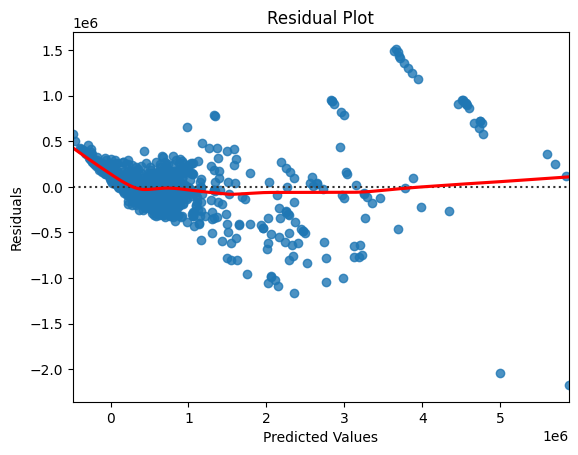

In [43]:
residuals = Y_test - predict
sns.residplot(x=predict, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [44]:
n = len(Y_test)
k = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.9131632907333244


In [45]:
import pickle as pk

In [46]:
pk.dump(Reg,open('Reg.pkl','wb'))